<h1>Timeseries for User Data</h1>

<b>Author:</b> Miraya Gupta\
<b>Date: </b> 7th March 2024\
<b>Purpose: </b> Creating timeseries visualisation for part D of the presentation

In [84]:
import os
import json
import plotly.graph_objects as ply
import matplotlib as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

<h2>1. Getting Data from JSON files</h2>

In [9]:
path = 'raw_tiktokData/viewing'
for file in os.listdir(path):
    file_path = os.path.join(path, file)
    print(file_path)
    list_results = []
    with open (file_path, 'r') as inFile:
        results = json.load(inFile)
        list_results.append(results)

raw_tiktokData/viewing/Sec2Gr1_77783.json
raw_tiktokData/viewing/Sec2Gr1_58248.json


In [11]:
type(list_results)

list

In [12]:
type(list_results[0])

list

In [13]:
type(list_results[0][0])

dict

list_results is a list of list of dictionaries. Each element in it represents a file/user, and each dictionary in the file/user represents a TikTok video.

<h2>2. Getting Date Information </h2>

In [17]:
list_results[0][0]

{'Date': '2024-03-01 18:55:08',
 'Link': 'https://www.tiktokv.com/share/video/7314484062578593067/'}

Each dictionary has a key 'Date' which contains the date in a string format. 

In [29]:
#Getting the datetime values for each user individually
def getUserDates(index_of_user):
    '''
    Input is a specific user in the sample as indicated by their index in the list_results. 
    Output is a pandas dataframe of the datetimes as datetime objects for each of the videos the user has seen. 
    '''
    user_dict_list = list_results[index_of_user]
    full_date_time_list = []
    day_list = []
    month_year_list = []
    df = pd.DataFrame()
    for dct in user_dict_list:
        string_date = dct['Date']
        #Converting to datetime object
        full_dt = datetime.strptime(string_date, '%Y-%m-%d %H:%M:%S')
        day = datetime.strptime(string_date[:10], '%Y-%m-%d')
        month_year = datetime.strptime(string_date[:7], '%Y-%m')
        
        full_date_time_list.append(full_dt)
        day_list.append(day)
        month_year_list.append(month_year)

    #building df
    df['datetime'] = full_date_time_list
    df['day'] = day_list
    df['monthyear'] = month_year_list
    return df

In [55]:
#Testing the function
x = getUserDates(0)

In [56]:
x.head()

,datetime,day,monthyear
0,2024-03-01 18:55:08,2024-03-01,2024-03-01
1,2024-02-04 19:59:44,2024-02-04,2024-02-01
2,2024-01-26 06:37:20,2024-01-26,2024-01-01
3,2024-01-26 06:37:08,2024-01-26,2024-01-01
4,2023-11-10 18:57:41,2023-11-10,2023-11-01


<h2>3. Checking Frequencies with Sample Data</h2>

In [58]:
len(x)

9120

In [59]:
x['monthyear'].unique()

<DatetimeArray>
['2024-03-01 00:00:00', '2024-02-01 00:00:00', '2024-01-01 00:00:00',
 '2023-11-01 00:00:00', '2023-10-01 00:00:00', '2023-09-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 7, dtype: datetime64[ns]

In [60]:
freq_table = x['monthyear'].value_counts()

In [61]:
freq_table.head()

monthyear
2023-12-01    3271
2023-11-01    1731
2023-10-01    1364
2024-01-01    1207
2023-09-01    1148
Name: count, dtype: int64

In [62]:
x['day'].unique()

<DatetimeArray>
['2024-03-01 00:00:00', '2024-02-04 00:00:00', '2024-01-26 00:00:00',
 '2023-11-10 00:00:00', '2023-10-30 00:00:00', '2023-09-28 00:00:00',
 '2023-09-27 00:00:00', '2024-03-06 00:00:00', '2024-03-02 00:00:00',
 '2024-02-29 00:00:00',
 ...
 '2023-09-17 00:00:00', '2023-09-16 00:00:00', '2023-09-15 00:00:00',
 '2023-09-14 00:00:00', '2023-09-13 00:00:00', '2023-09-12 00:00:00',
 '2023-09-11 00:00:00', '2023-09-10 00:00:00', '2023-09-09 00:00:00',
 '2023-09-08 00:00:00']
Length: 157, dtype: datetime64[ns]

In [63]:
freq_table = x['day'].value_counts()

In [64]:
freq_table.head()

day
2023-12-30    585
2023-12-25    316
2023-12-18    293
2023-12-26    269
2023-12-21    235
Name: count, dtype: int64

The number of videos seen is large enough on both days and months for it to make sense to have the x-axis either as day or as yearmonth. 

In [67]:
#Testing how to index a frequency table
freq_table.iloc[0]

585

In [69]:
freq_table = pd.DataFrame(freq_table)

In [76]:
freq_table.head()

,count
day,
2023-12-30,585
2023-12-25,316
2023-12-18,293
2023-12-26,269
2023-12-21,235


<h2>4. Building the Visualisation </h2>

In [94]:
def getUserTimeSeries(index_of_user, time_metric):
    '''
    Input is an index of a specific user and a given metric of time
    Output is a timeseries visualisation of their TikTok usage. 
    '''
    #Get df
    user_df = getUserDates(index_of_user)

    #Build frequency table
    freq_table = user_df[time_metric].value_counts()
    freq_table = pd.DataFrame(freq_table)
    fig = ply.Figure()
    fig.add_trace(ply.Scatter(x=freq_table.index, y=freq_table.iloc[:, 0], mode='markers', name='Time Series'))

    fig.update_layout(title='Time Series Plot',
                  xaxis_title='Date',
                  yaxis_title='Value')
    fig.show()

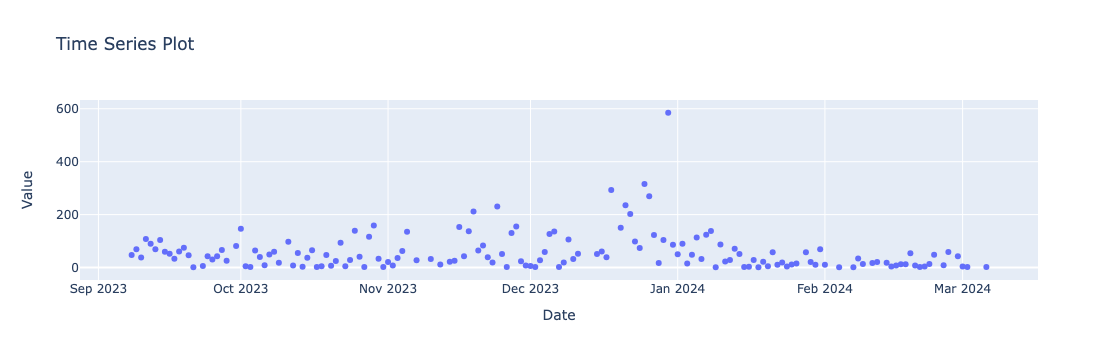

In [95]:
#Testing
getUserTimeSeries(0, 'day')

<h2>5. Applying Visualisation to All Users</h2>

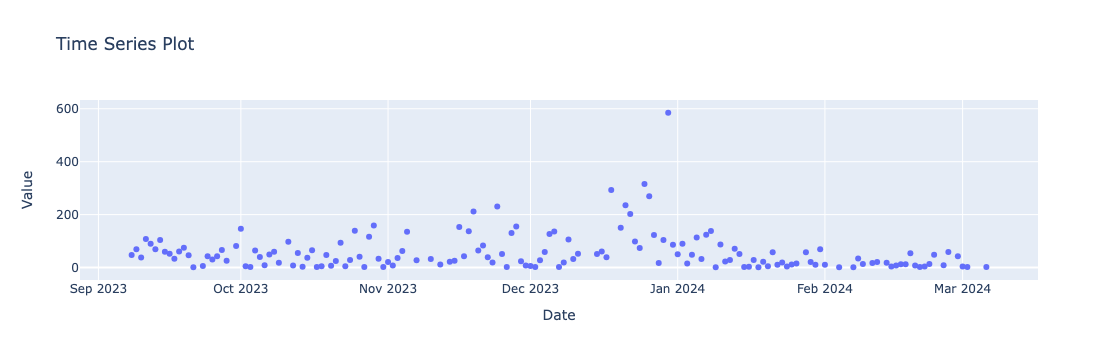

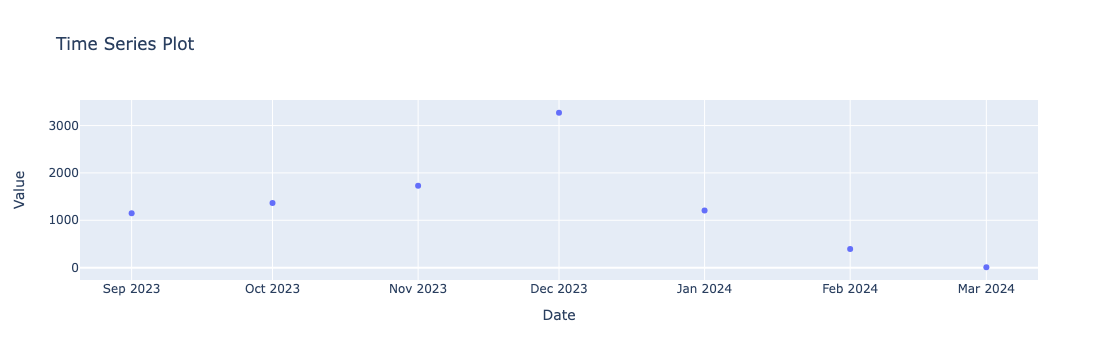

In [96]:
for i in range(len(list_results)):
    for metric in ['day', 'monthyear']:
        getUserTimeSeries(i, metric)

Questions: how to make the lines not wierd (mode lines or mode scatterplot?)
is this correct? 